In [2]:
import pandas as pd
import numpy as np

In [3]:
import missingno as msno

In [4]:
train = pd.read_csv("../data/train.csv")

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

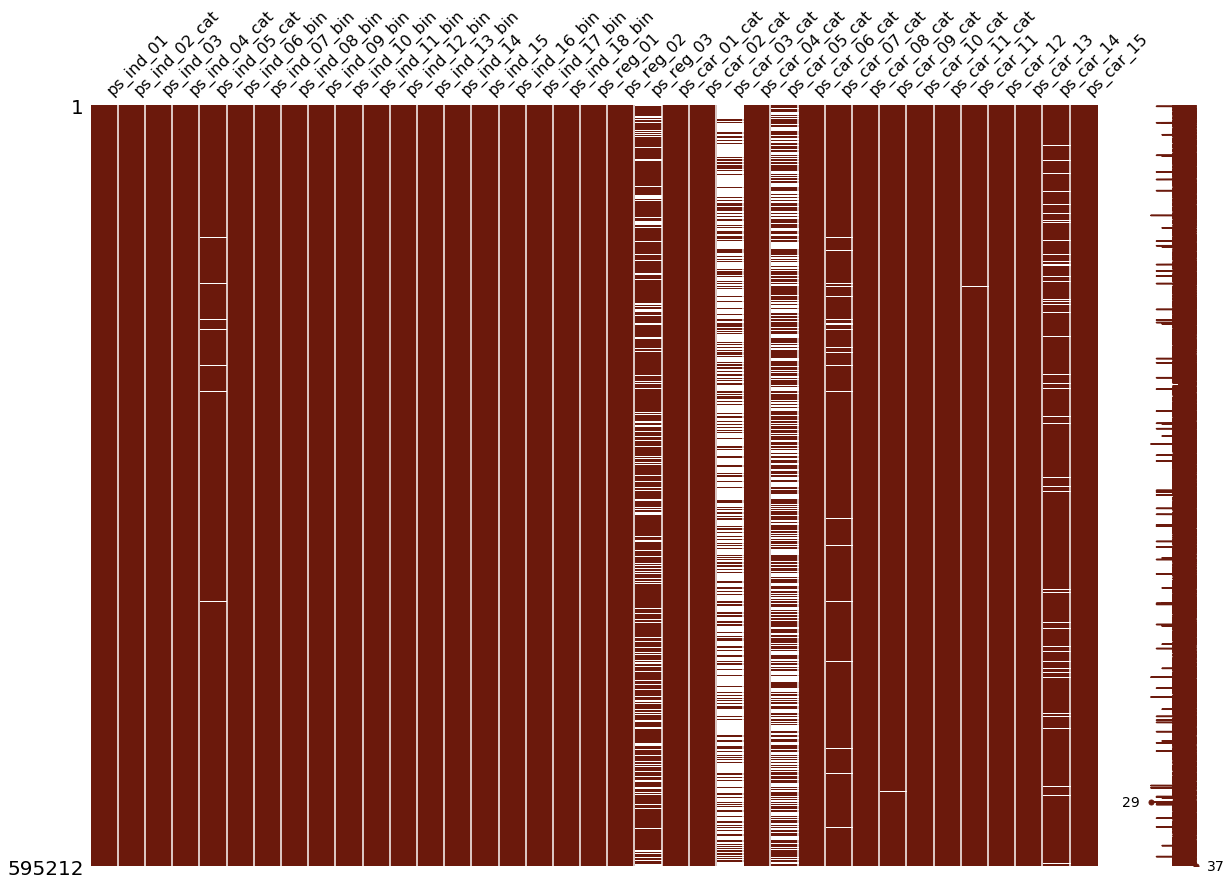

In [6]:
msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20,14), color=(0.42, 0.1, 0.05))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

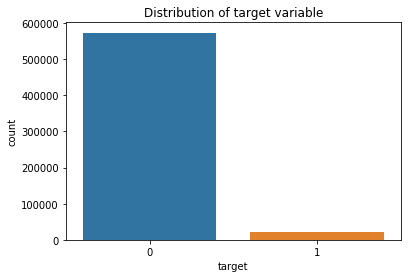

In [8]:
text = "Distribution of target variable"
sns.countplot(x="target", data=train)
plt.title(text)
plt.show()

In [9]:
# 统计数据类型
from collections import Counter
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [10]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

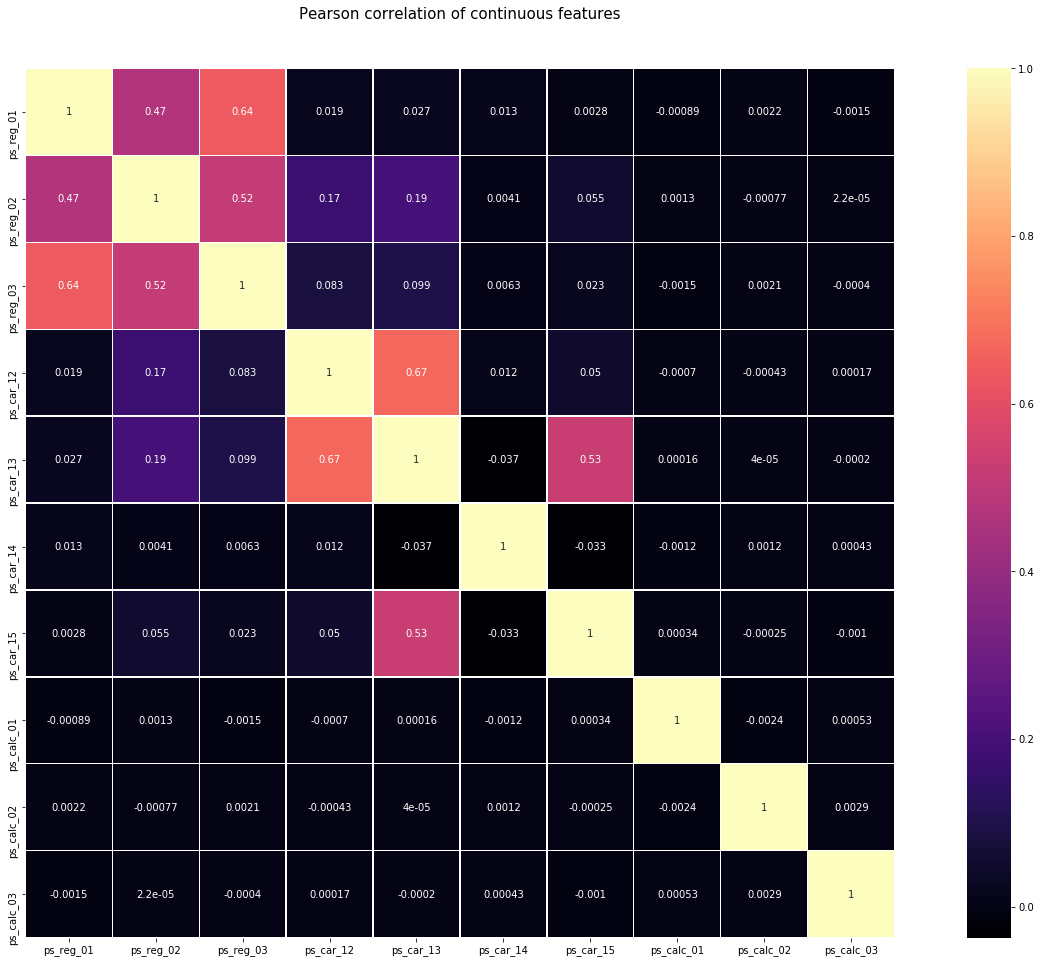

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(26,16))
plt.title("Pearson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor="white", annot=True)
plt.show()

In [12]:
# 强相关的特征
# (ps_reg_01, ps_reg_03)

# (ps_reg_02, ps_reg_03)

# (ps_car_12, ps_car_13)

# (ps_car_13, ps_car_15)

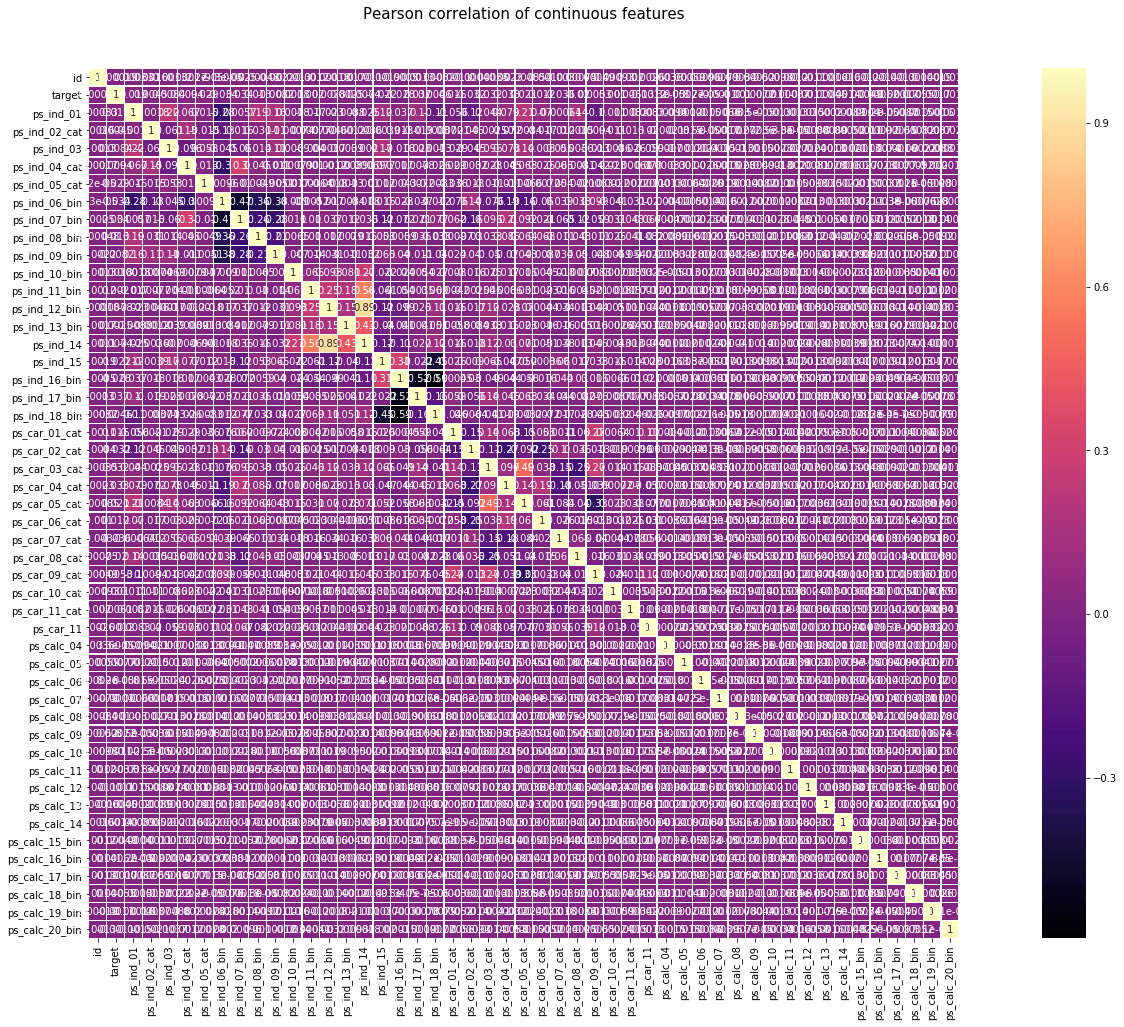

In [13]:
colormap = plt.cm.magma
plt.figure(figsize=(30,16))
plt.title("Pearson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor="white", annot=True)
plt.show()

In [14]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state=17)

In [16]:
print(mf)

[ 0.01402035  0.00431986  0.0055185   0.00778454  0.00157233  0.00197537
  0.01226     0.00553038  0.00545101  0.00562139]


In [17]:
# 检查只有二分类值的特征的值的分布
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

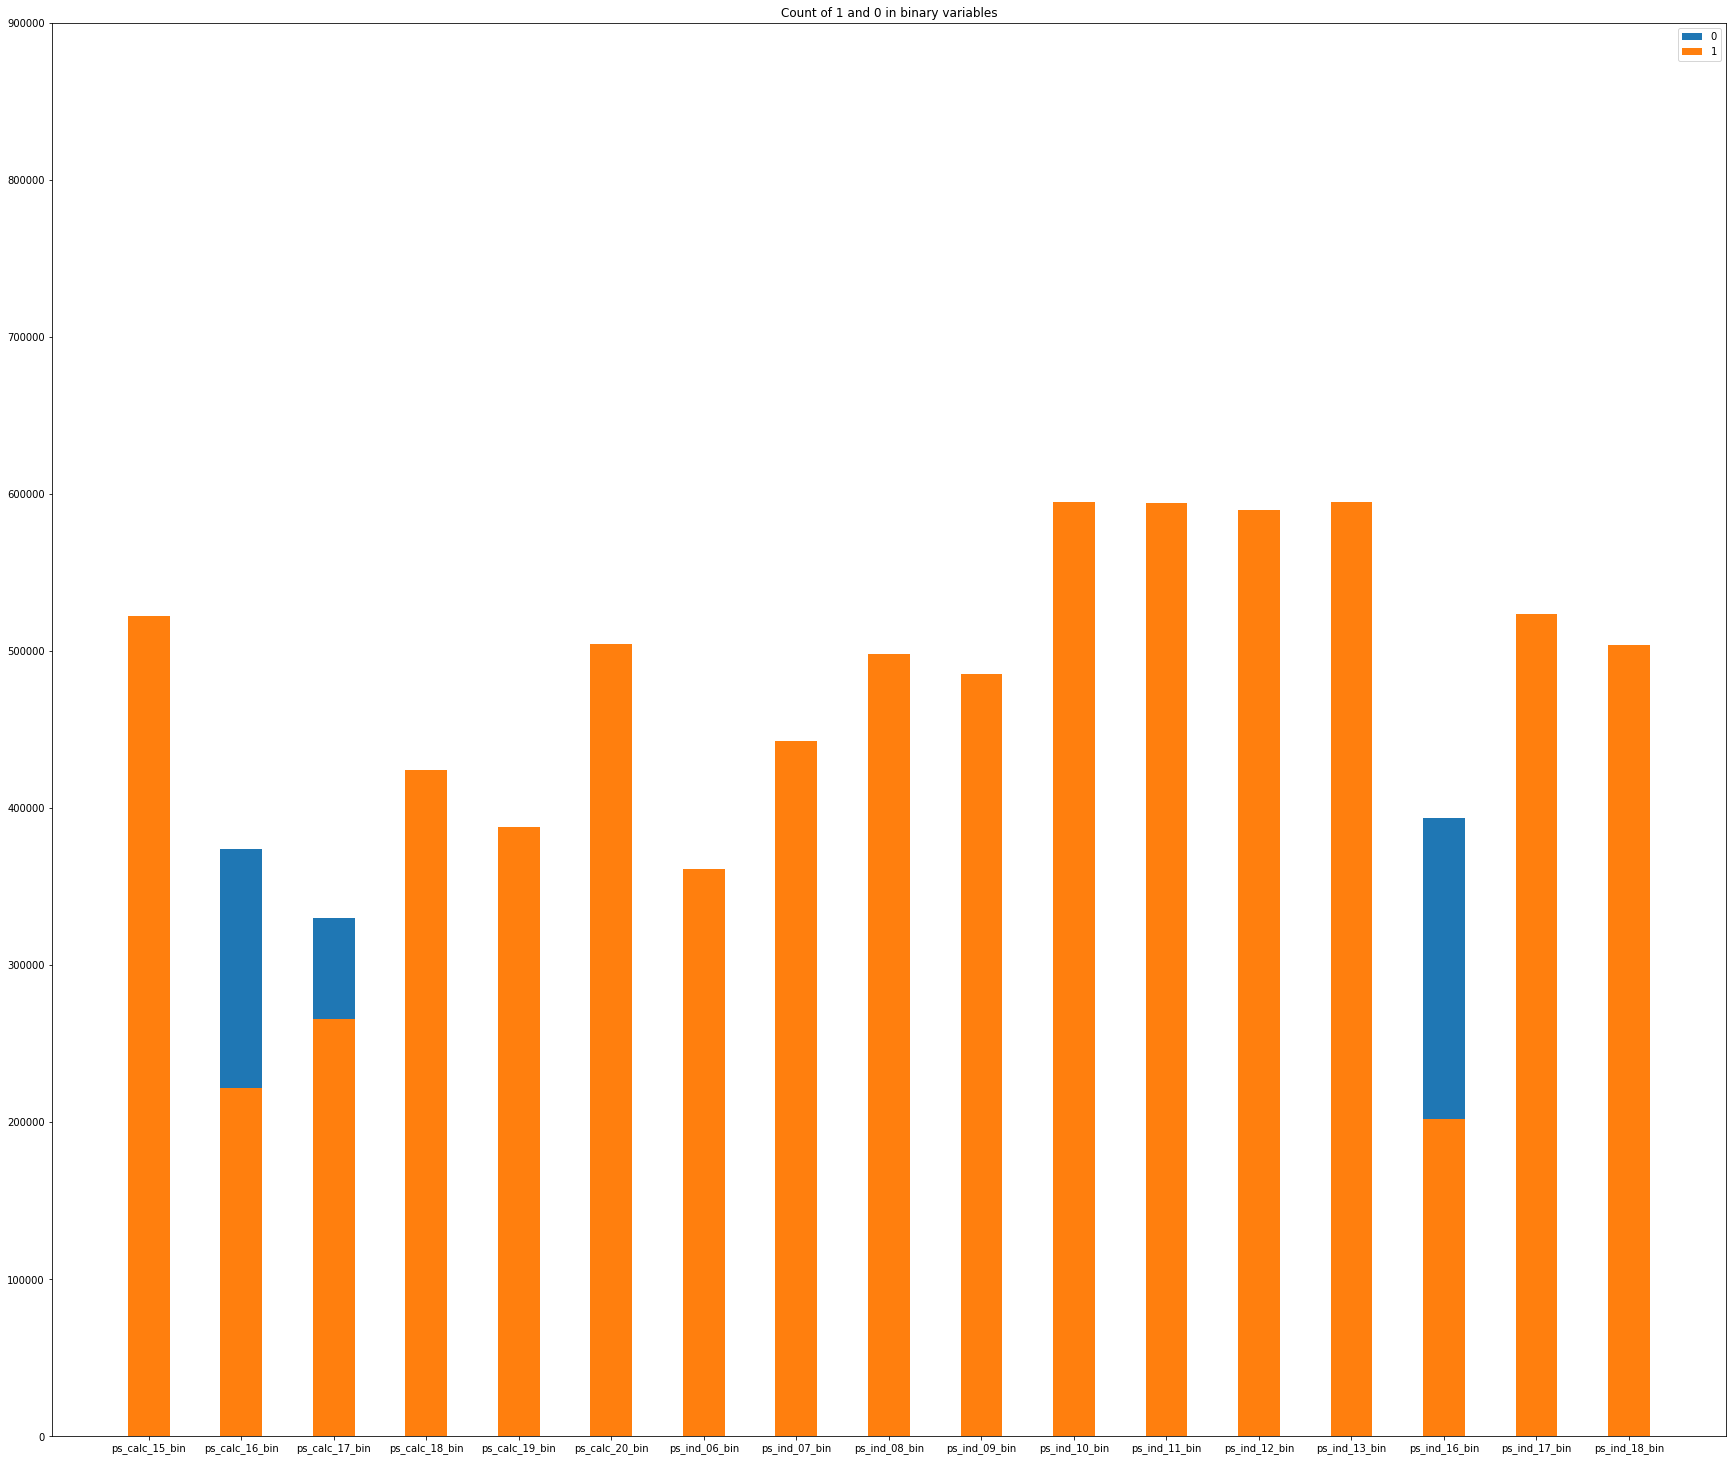

In [18]:
width=0.45
fig, ax = plt.subplots(figsize=(30,26))
p1 = ax.bar(bin_col, one_list, width)
p2 = ax.bar(bin_col, zero_list,width)
ax.set_title("Count of 1 and 0 in binary variables")
ax.set_yticks(np.arange(0, 1000000, 100000))
ax.legend((p1[0], p2[0]), ('0', '1'))

In [19]:
# 使用随机森林进行训练
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, 
                            min_samples_leaf=4, max_features=0.2,
                           n_jobs=-1, random_state=0)
rf.fit(train.drop(["id", "target"], axis=1), train.target)
features = train.drop(["id", "target"], axis=1).columns.values
print("--------------- Training Done! -------------")

--------------- Training Done! -------------


(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16]),
 <a list of 10 Text yticklabel objects>)

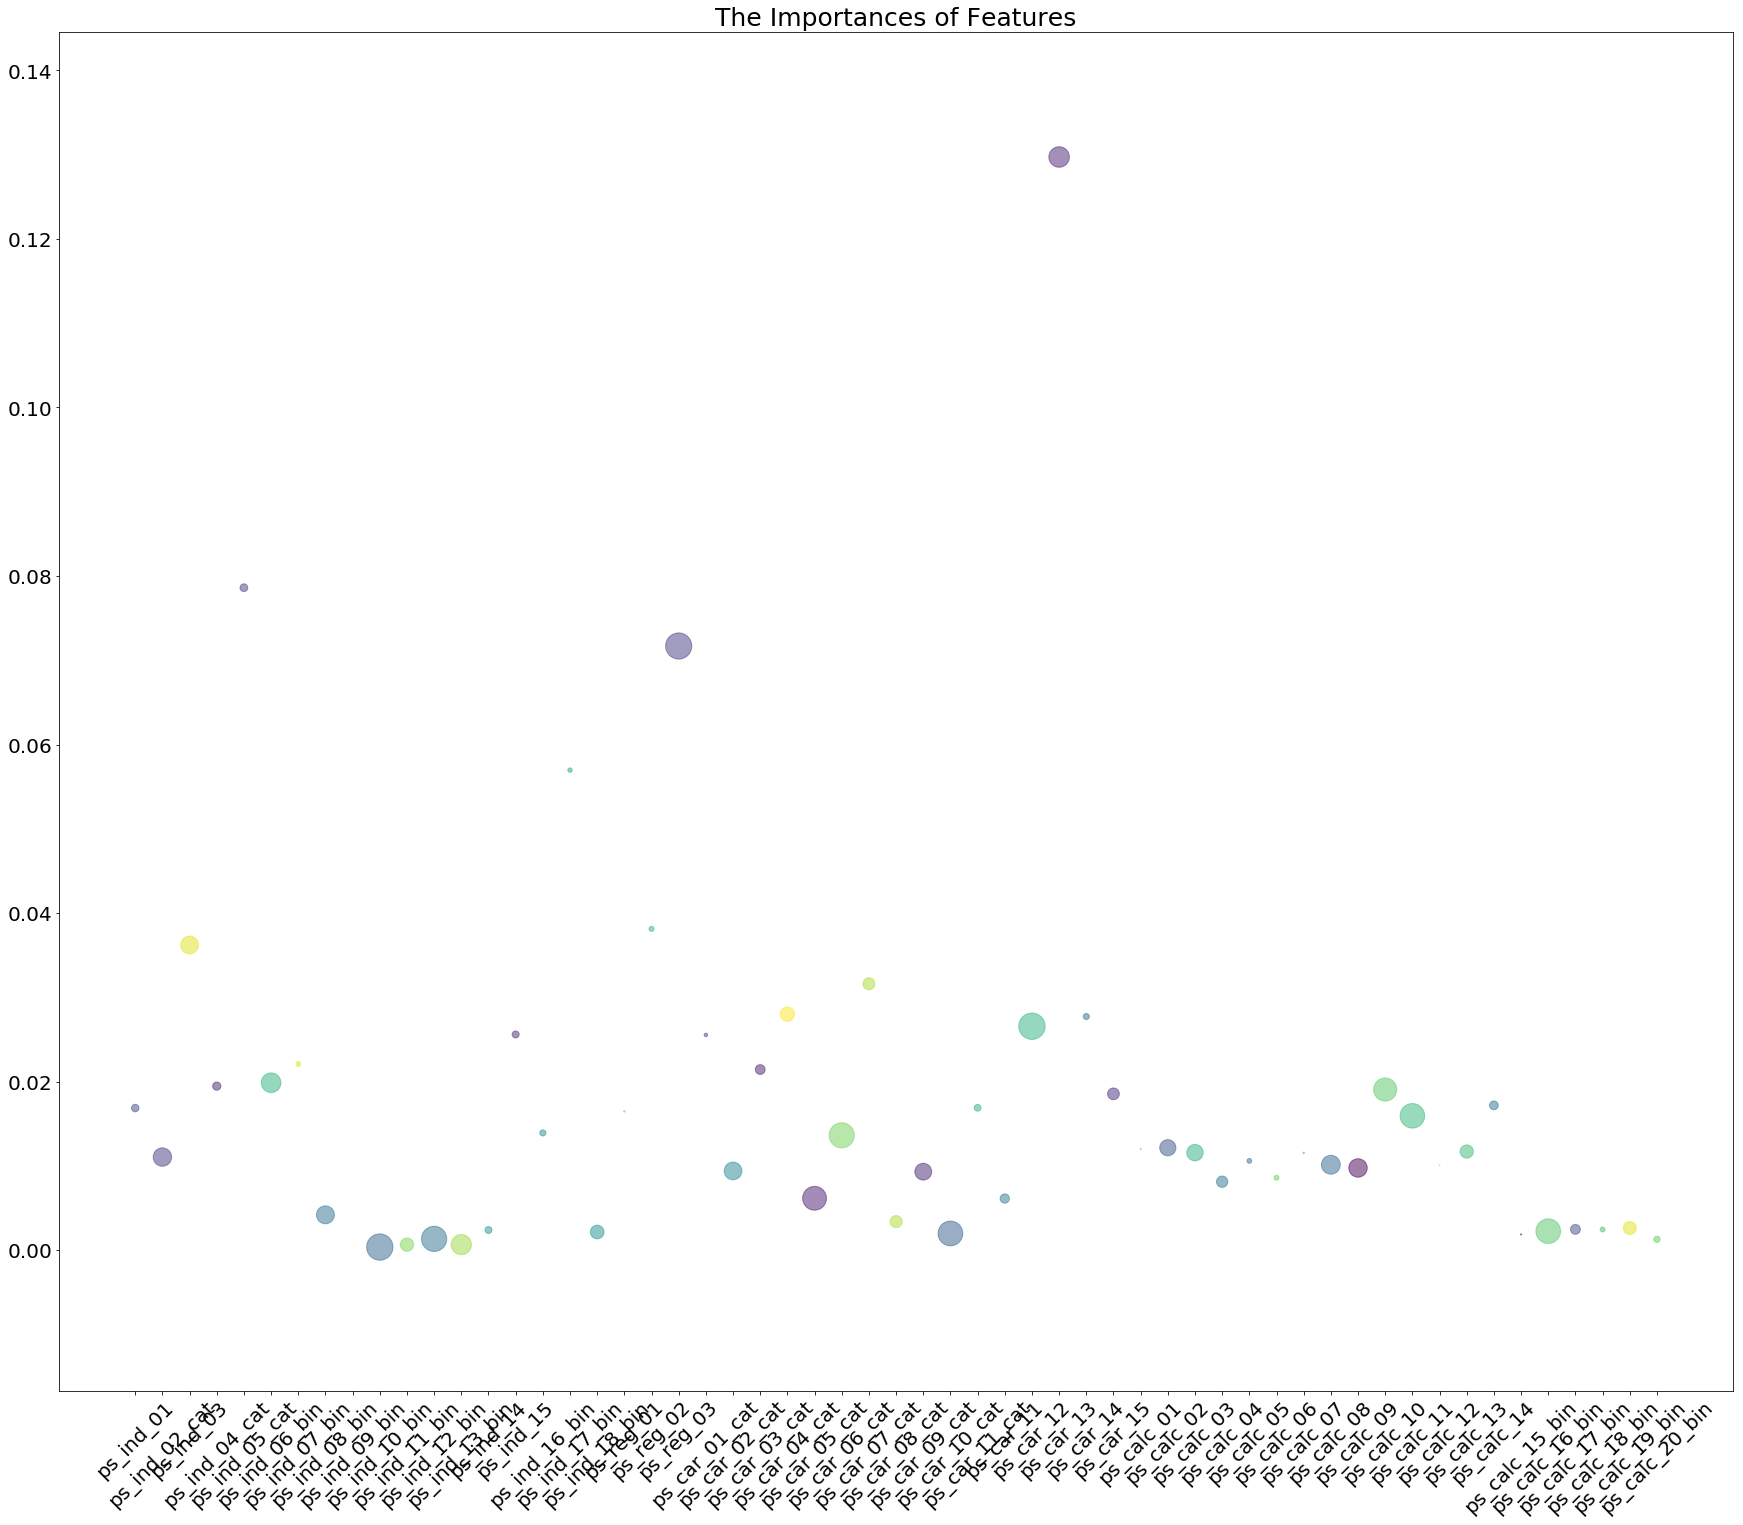

In [47]:
plt.figure(figsize=(30,25))
N = 57
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)
x = range(len(features))
plt.scatter(x, rf.feature_importances_, s=area,c=colors, alpha=0.5)
plt.title("The Importances of Features", fontsize=25)
plt.xticks(x, features, rotation=45, fontsize=20)
plt.yticks(fontsize=20)

(array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14]),
 <a list of 8 Text xticklabel objects>)

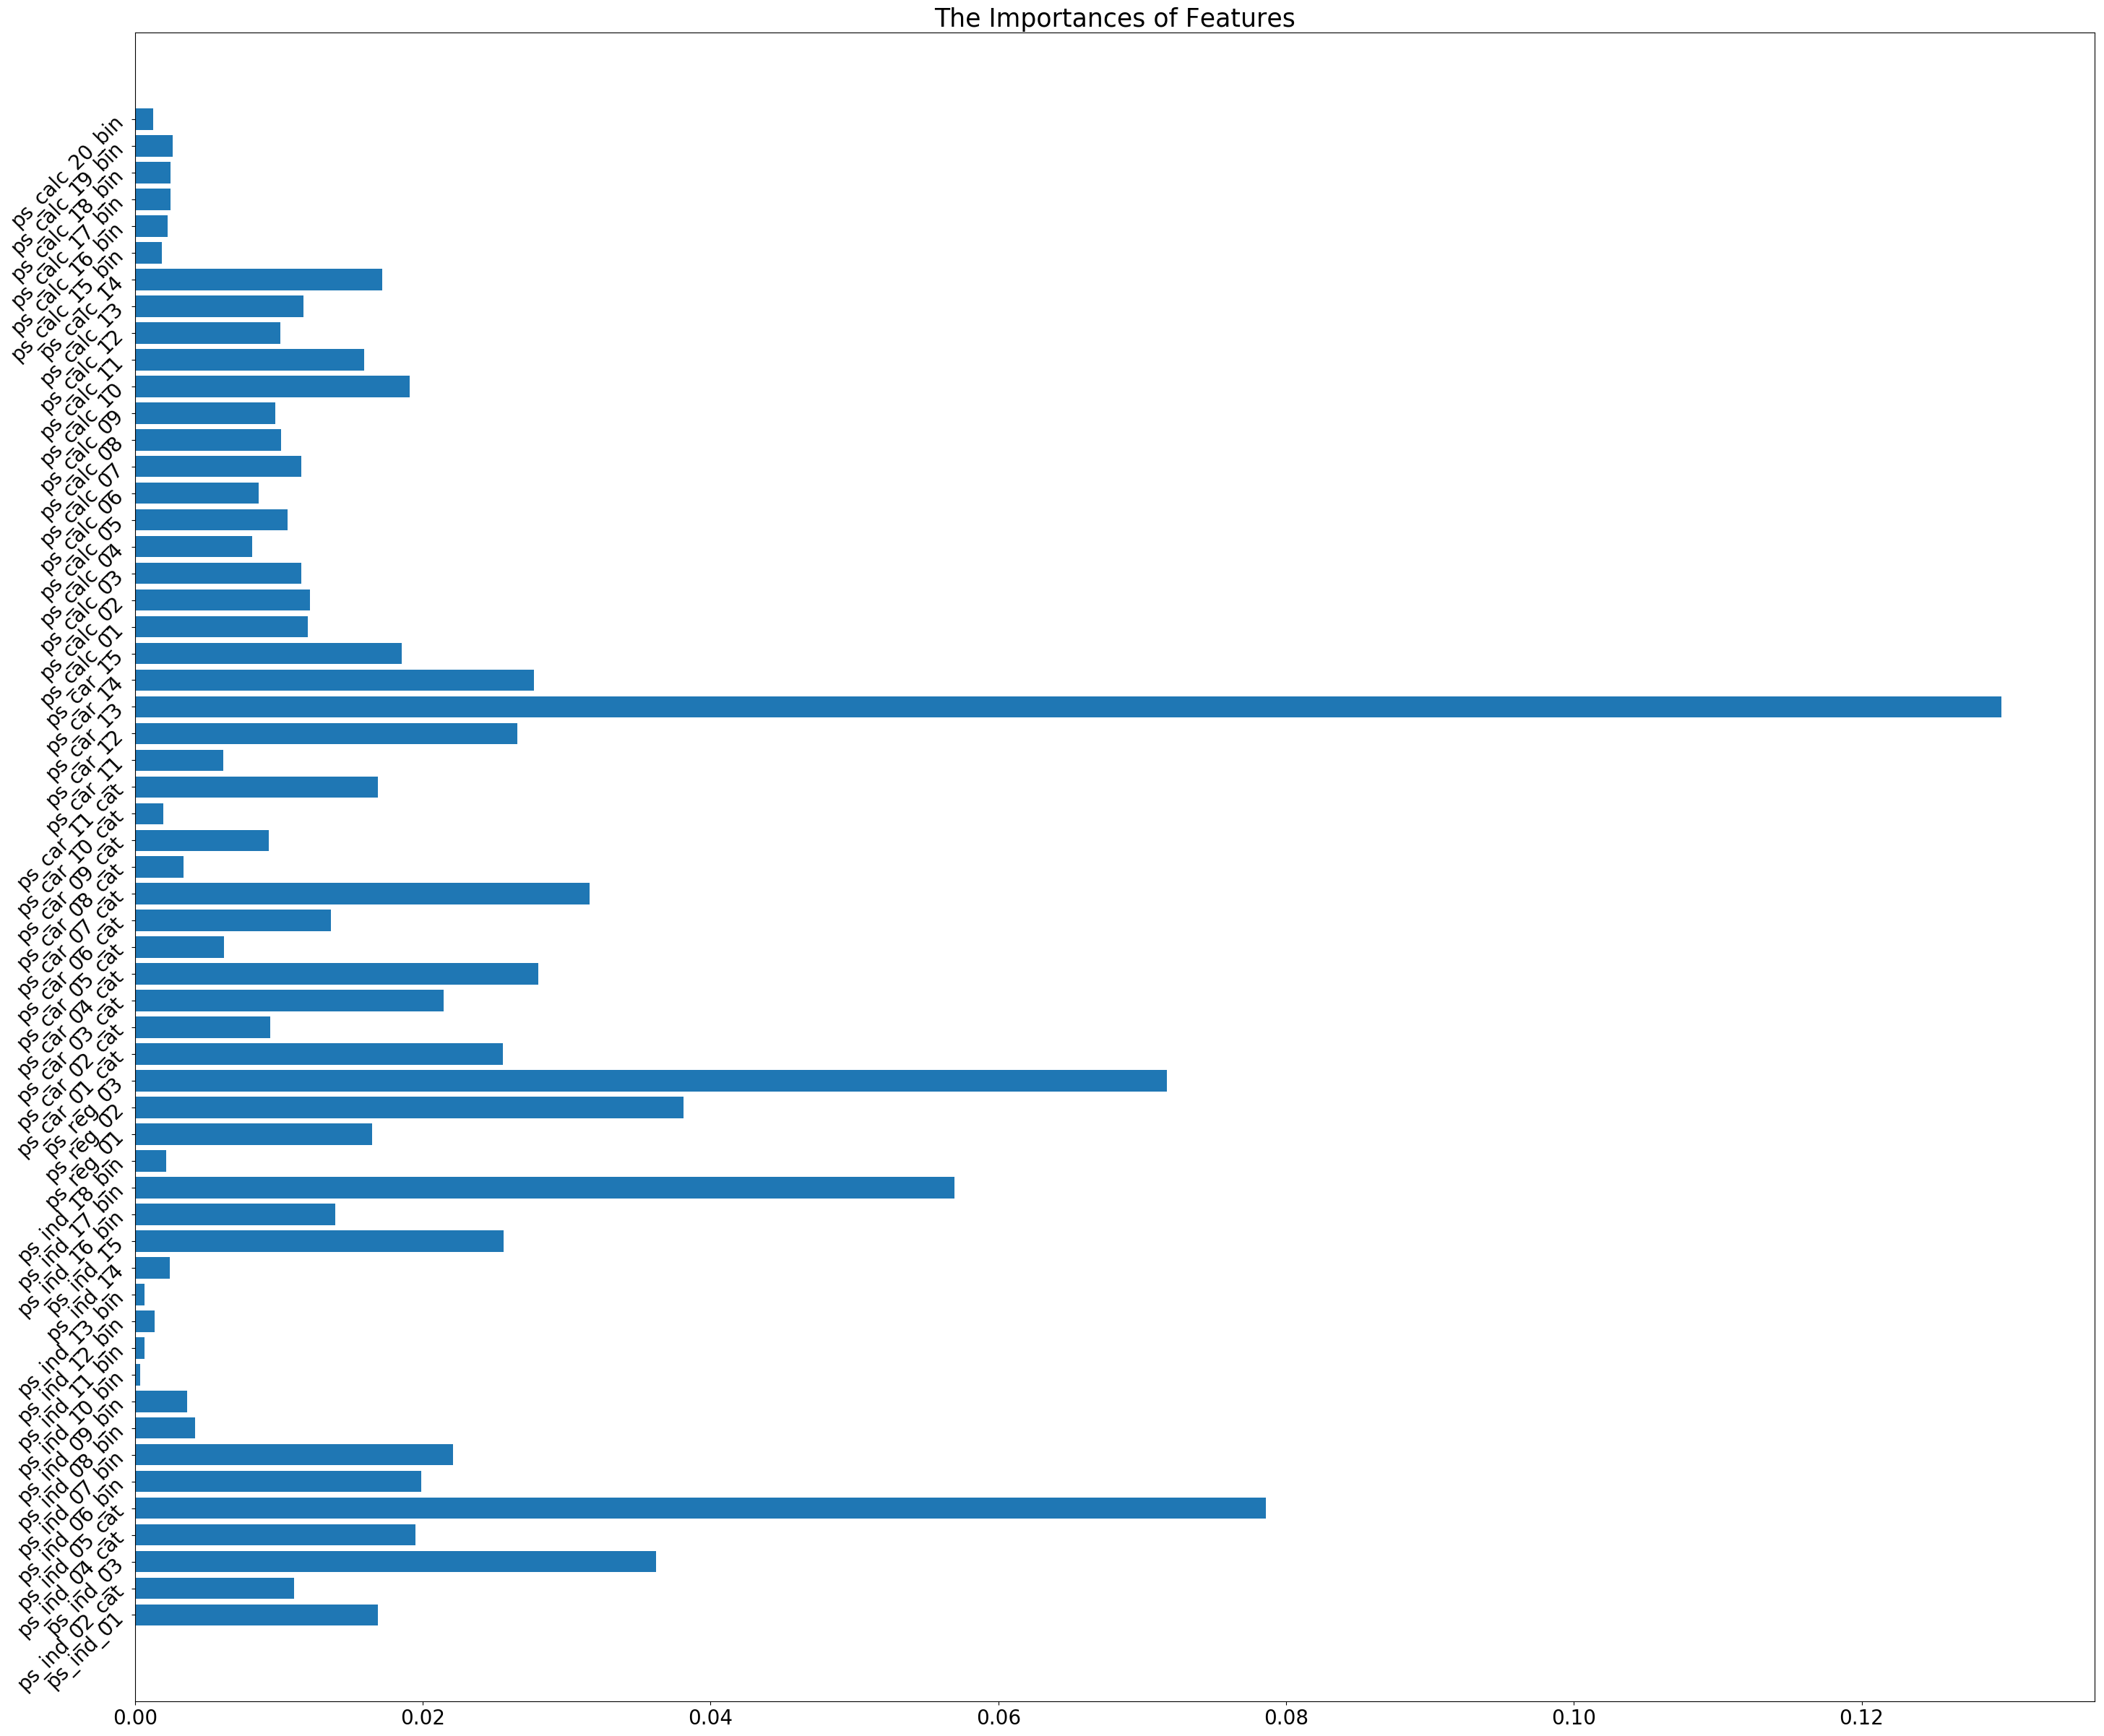

In [78]:
plt.figure(figsize=(35,30))
x = range(len(features))
plt.barh(x, rf.feature_importances_)
plt.title("The Importances of Features", fontsize=25)
plt.yticks(x, features, rotation=45, fontsize=20)
plt.xticks(fontsize=20)

In [95]:
# x1, y1 = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features),reverse = False)))
# plt.barh(y1, x1)
# plt.title("The Importances of Features", fontsize=25)
# plt.yticks(y1, rotation=45, fontsize=20)
# plt.xticks(fontsize=20)